In [1]:
import pandas as pd

In [2]:
# UCI Machine Learning Repo
# dataset: https://archive.ics.uci.edu/dataset/228/sms+spam+collection 
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Data Cleaning

In [3]:
messages['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [4]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Check for Null Value
messages.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
# check for duplicate values
messages.duplicated().sum()

403

In [7]:
# remove duplicates
messages = messages.drop_duplicates(keep='first').reset_index(drop=True)

In [8]:
messages.duplicated().sum()

0

In [9]:
messages.shape

(5169, 2)

## EDA

In [10]:
messages['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

<Axes: xlabel='label'>

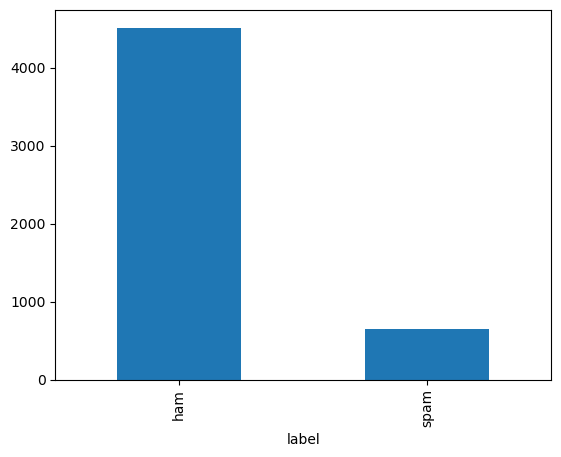

In [11]:
messages['label'].value_counts().plot(kind='bar')

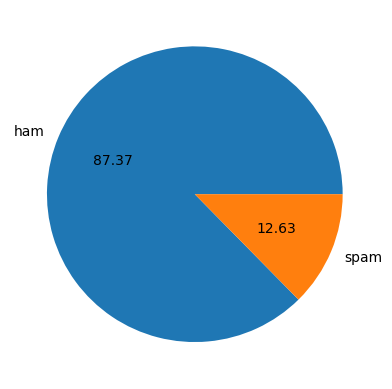

In [12]:
import matplotlib.pyplot as plt
plt.pie(messages['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

## Data Preprocessing

In [13]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
ps = PorterStemmer()

In [15]:
messages['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [16]:
len(messages)

5169

In [17]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
# It is basically a List
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

## Model Building

In [19]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
# It will Take most frequent 2500 Word
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
X.shape

(5169, 2500)

In [21]:
y=pd.get_dummies(messages['label'])
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5164,False,True
5165,True,False
5166,True,False
5167,True,False


In [22]:
y=y.iloc[:,1].values
y

array([False, False,  True, ..., False, False, False])

In [23]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [24]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
y_train

array([False, False, False, ..., False,  True,  True])

In [26]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.97678916827853


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       896
        True       0.89      0.95      0.92       138

    accuracy                           0.98      1034
   macro avg       0.94      0.97      0.95      1034
weighted avg       0.98      0.98      0.98      1034



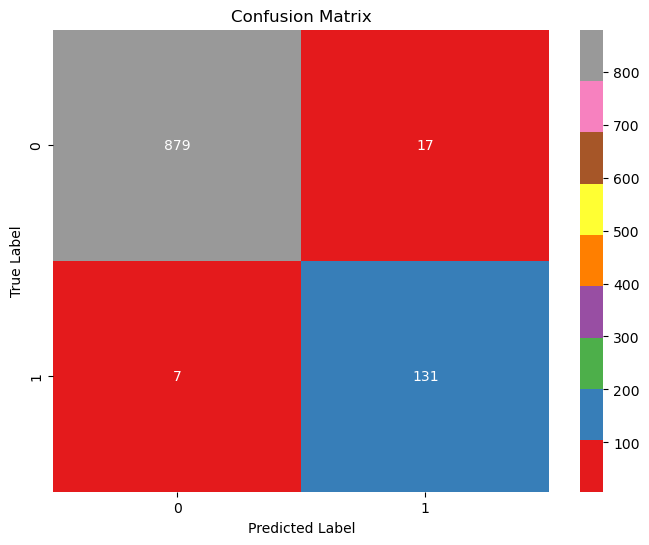

In [28]:
# Print confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming you have the confusion matrix stored in 'conf_matrix'
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Set1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
#TF_IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# fit
tfvectorizer = TfidfVectorizer(max_features=2500)
X = tfvectorizer.fit_transform(corpus).toarray()

y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [30]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [31]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [32]:
y_pred=spam_detect_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.97678916827853


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       896
        True       0.99      0.83      0.91       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



### Perfect Model as Precision of True Class (Spam) are 1 so "False Positive (FP)" is equal to 0

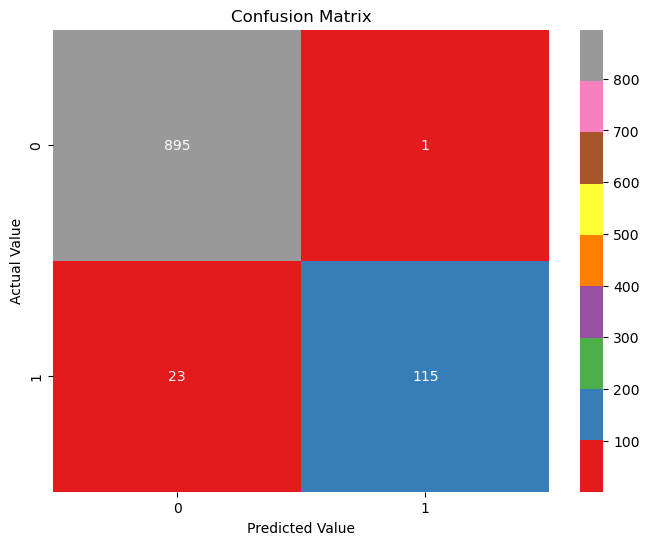

In [34]:
# Print confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming you have the confusion matrix stored in 'conf_matrix'
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Set1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [35]:
import pickle
pickle.dump(tfvectorizer,open('tfvectorizer.pkl','wb'))
pickle.dump(spam_detect_model,open('model.pkl','wb'))

In [36]:
tfidf = pickle.load(open('tfvectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))



In [37]:
message="SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"

corpus_message=[]
review = re.sub('[^a-zA-Z]', ' ', message)
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
corpus_message.append(review)
corpus_message


['six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info']

In [38]:
X_input = tfidf.transform(corpus_message).toarray()
X_input

array([[0., 0., 0., ..., 0., 0., 0.]])

In [39]:
model.predict(X_input)

array([ True])

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load the trained TfidfVectorizer and model
tfidf = pickle.load(open('tfvectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

# New message for prediction
message = "SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"

# Preprocess the new message
corpus_message = []
review = re.sub('[^a-zA-Z]', ' ', message)
review = review.lower()
review = review.split()

review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
corpus_message.append(review)

# Use transform instead of fit_transform on the new data
X_input = tfidf.transform(corpus_message).toarray()

# Predict using the model
result = model.predict(X_input)
print(result)

[ True]
